## Pipeline Level 3: Modeling and Results Output ##
Builds FOE (Future Overfit Ensemble) models for each stock ticker. This method models each day separately attempting to overfit a single rediction. The results are written to a data frame.

The data frame is graphed and basic model statistics provided. The data farme is saved to a File for Level 4 Action Analysis

**References:**
Look at Sparse PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html

install plaidml: https://towardsdatascience.com/plaidml-deep-learning-on-a-budget-ce22b58ba8c2

LTSM Code: https://medium.com/analytics-vidhya/beginners-guide-to-stock-prediction-using-lstm-7010bf8b8c21

Neural Networks for Regression: https://vitalflux.com/keras-neural-network-for-regression-problem/

Regression Metrics: https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/
https://heartbeat.fritz.ai/linear-regression-using-keras-and-python-7cee2819a60c


https://towardsdatascience.com/walking-through-support-vector-regression-and-lstms-with-stock-price-prediction-45e11b620650

SGD Regression: https://www.kaggle.com/arpandas65/simple-sgd-implementation-of-linear-regression 

In [1]:
import os
import sys
import time
from datetime import date
from datetime import datetime
import time
import json
import platform
import pickle

#import stoneburner
#//*** Custom Functions:
#//*** mr_clean_text(input_series)
#//*** tokenize_series(input_series)
#//*** remove_stop_words(input_series)

# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
subreddits = ["wallstreetbets", "stocks", "wallstreetbetsOGs", "spacs", "investing", "pennystocks", "stockmarket", "options", "robinhoodpennystocks", "wallstreetbetsnew", "smallstreetbets"]
#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

#//*** Input_filename: Comments to Process.
#//*** This will eventually be a list of files
#input_filename  =".\\data\\wallstreetbets_comments.csv.zip"
interval="daily"
target_col = 'target_1'
#//*** Path to the stock ticker JSON file
stock_ticker_filename = "./data/stock_tickers.json"


results_df = pd.DataFrame(columns=['symbol','target','model','data','rmse','r2','actual','predict'])

#//*** Load the Stock Tickers
f = open(stock_ticker_filename, "r")
symbols = json.loads(f.read())['symbols']

#symbols = ["bb"]
f.close()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

import time
from sklearn import linear_model

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

def load_pickle(filepath):
    import pickle
    infile = open(filepath,'rb')
    
    output = pickle.load(infile)
    
    infile.close
    
    return(output)

In [3]:
try:
    from keras.models import Sequential

    #//*** Verify Plaid ML is working
    import plaidml.keras
    from sklearn.svm import SVR
    import os
    os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

    plaidml.keras.install_backend()
    import tensorflow.keras
    from tensorflow.keras import models
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers

    import tensorflow.keras.backend as K

    K
except:
    print("Trouble with Tensorflow")

Trouble with Tensorflow


Building tfidf dataframe
Build tfidf Descending Values


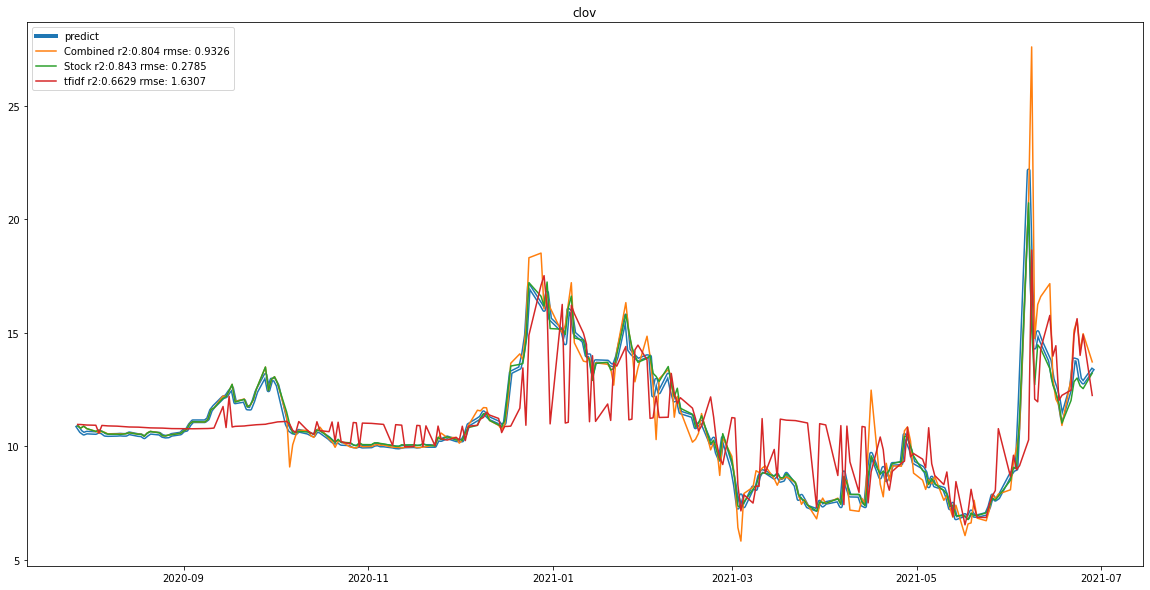

Building tfidf dataframe
Build tfidf Descending Values


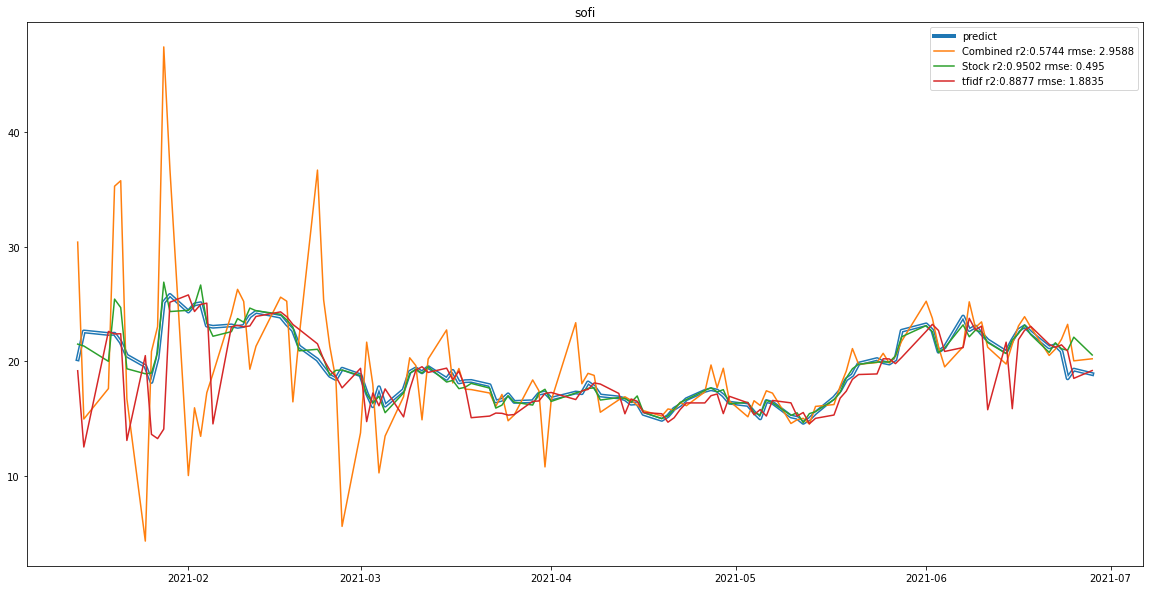

Building tfidf dataframe
Build tfidf Descending Values


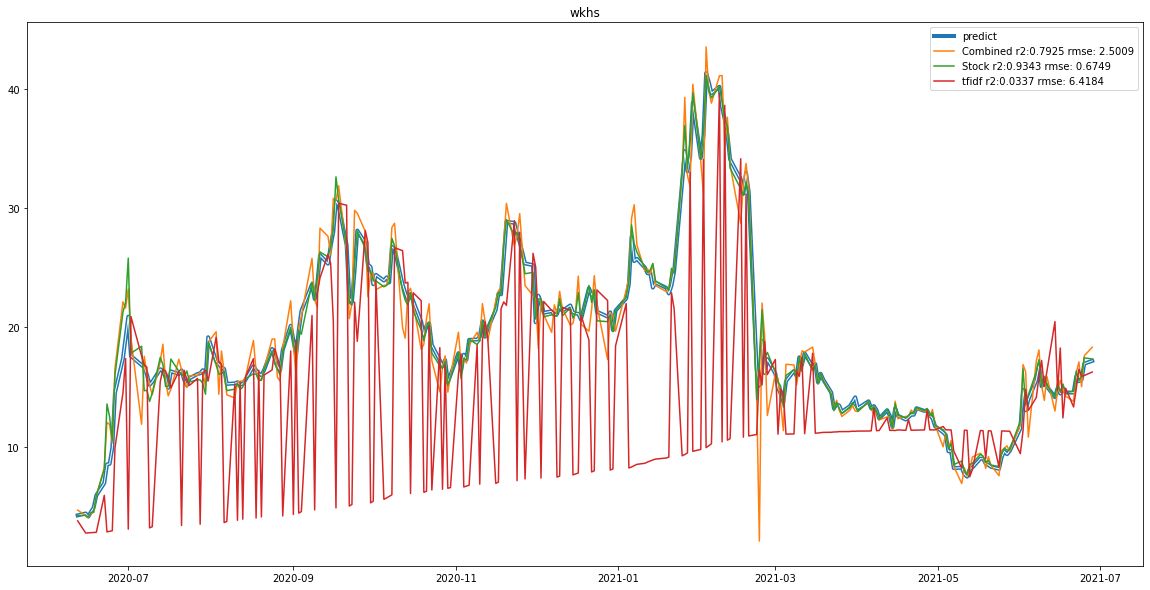

Building tfidf dataframe
Build tfidf Descending Values


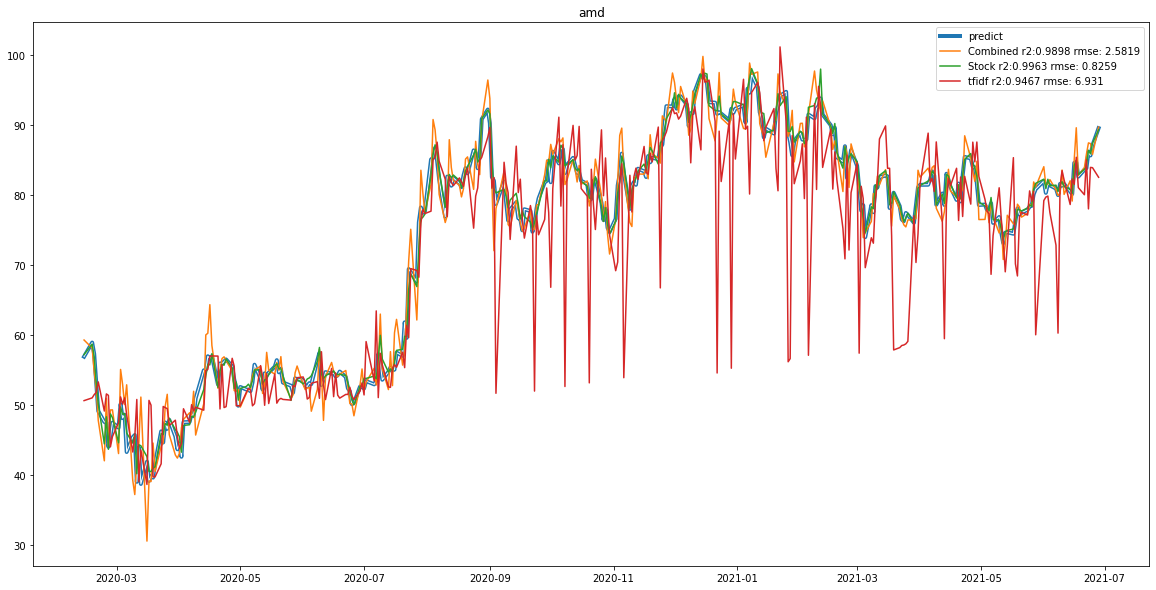

Building tfidf dataframe
Build tfidf Descending Values


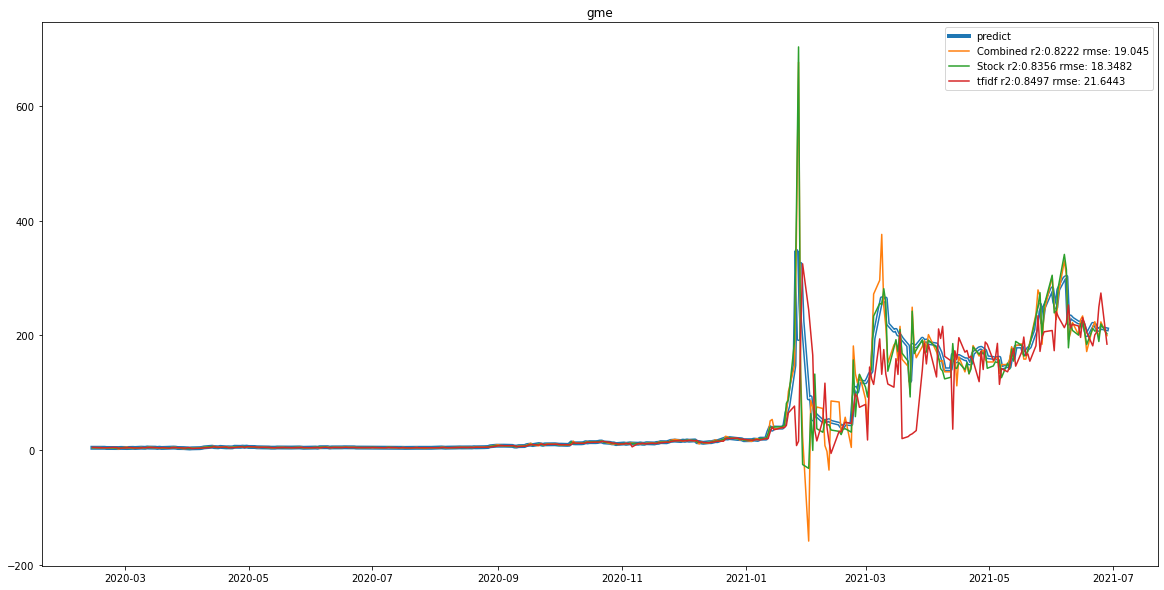

Building tfidf dataframe
Build tfidf Descending Values


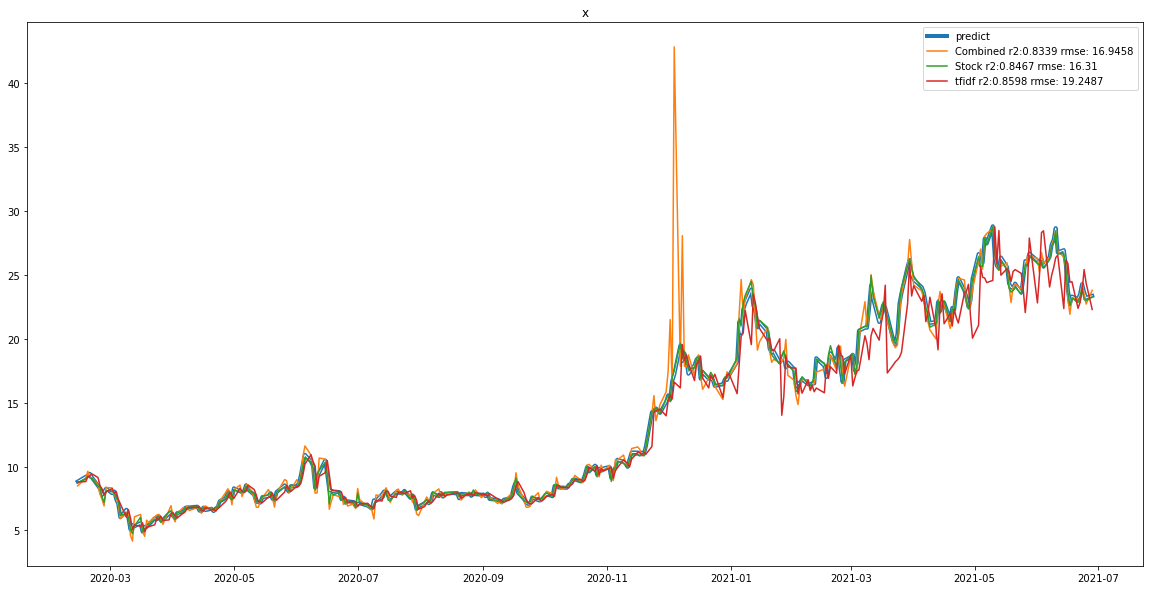

Building tfidf dataframe
Build tfidf Descending Values


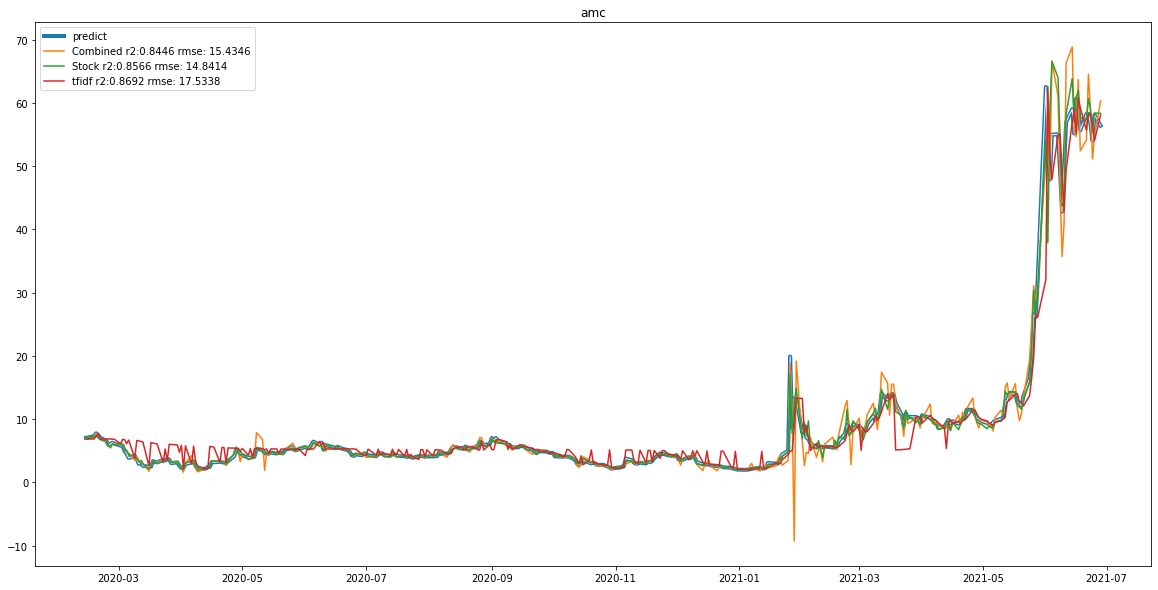

Building tfidf dataframe
Build tfidf Descending Values


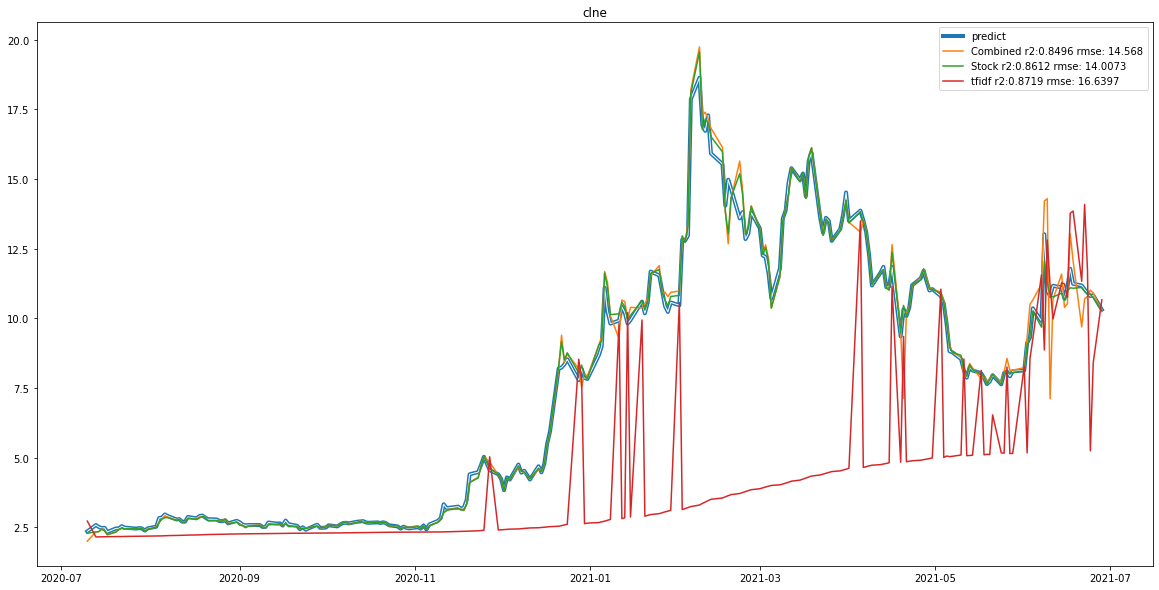

Building tfidf dataframe
Build tfidf Descending Values


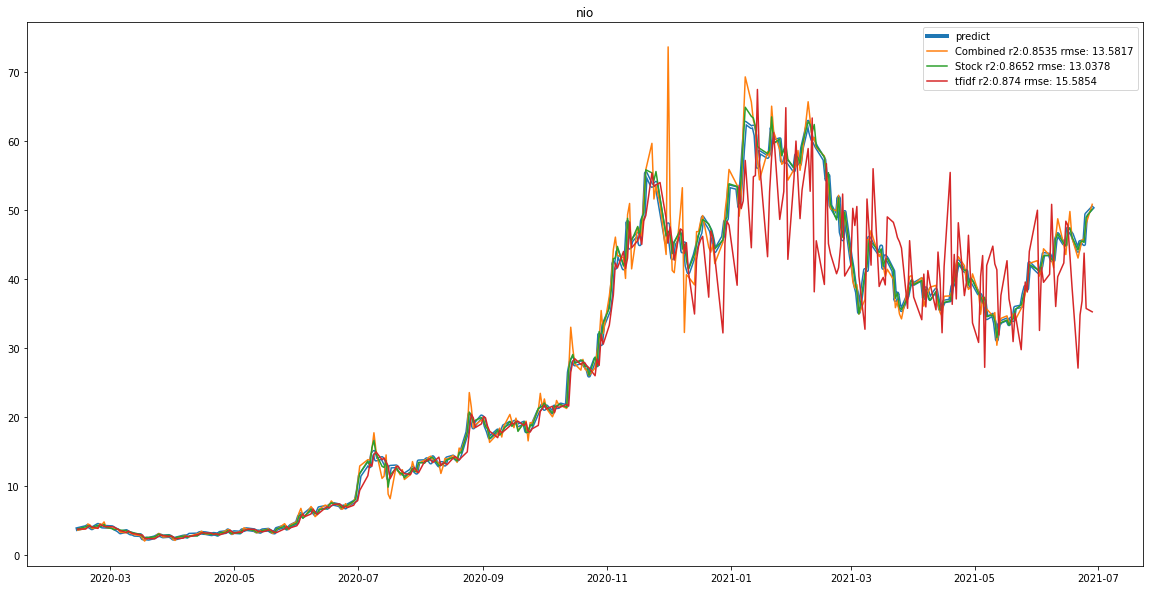

Building tfidf dataframe
Build tfidf Descending Values


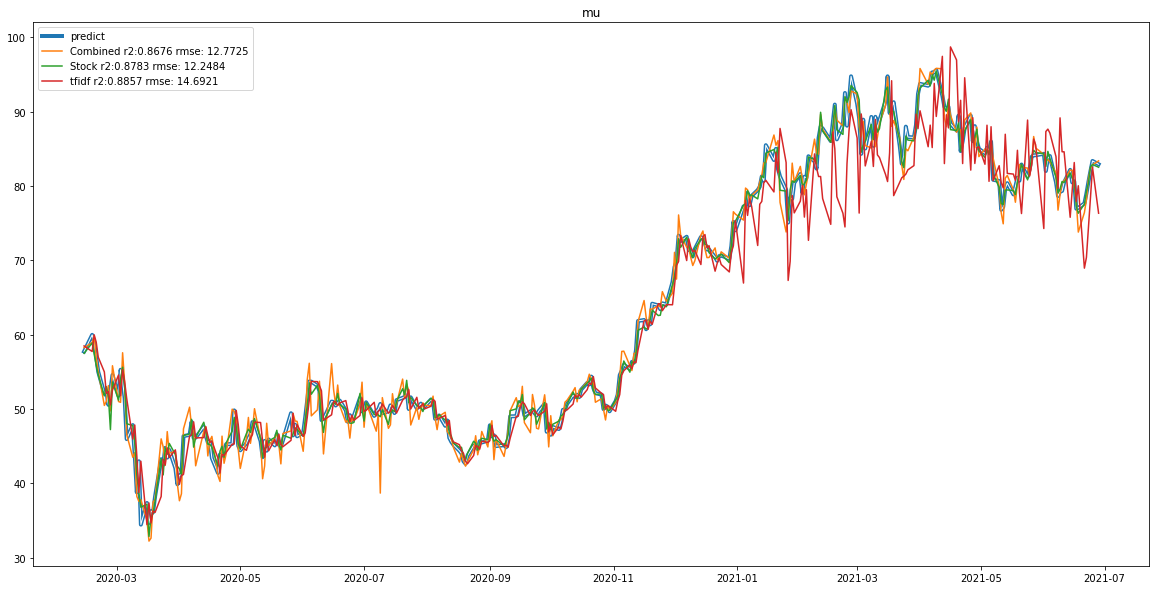

Building tfidf dataframe
Build tfidf Descending Values


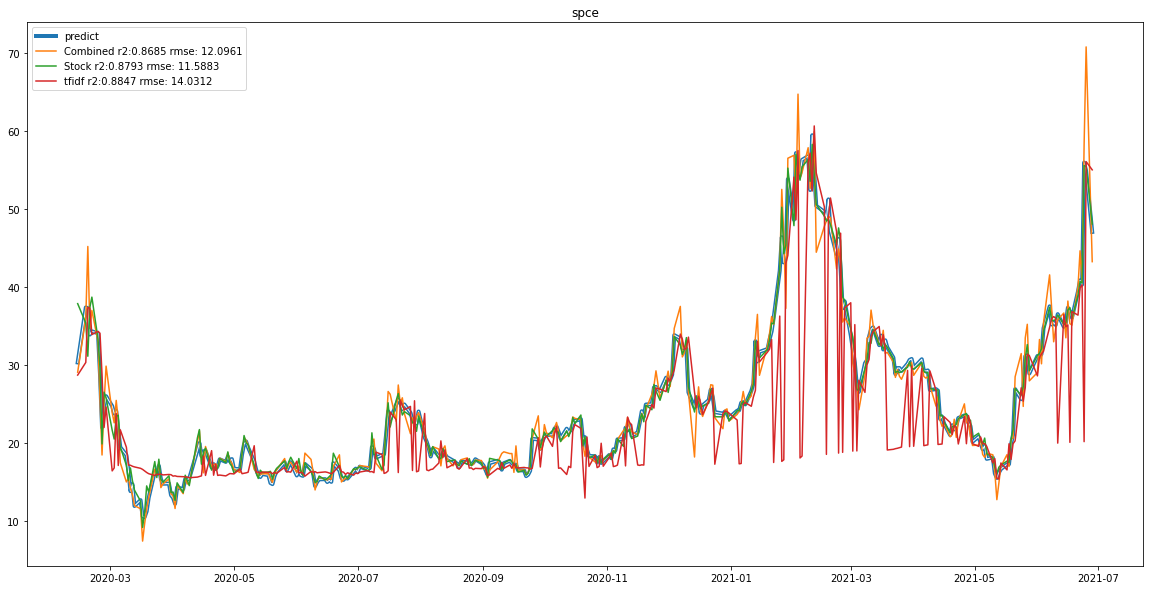

Building tfidf dataframe
Build tfidf Descending Values


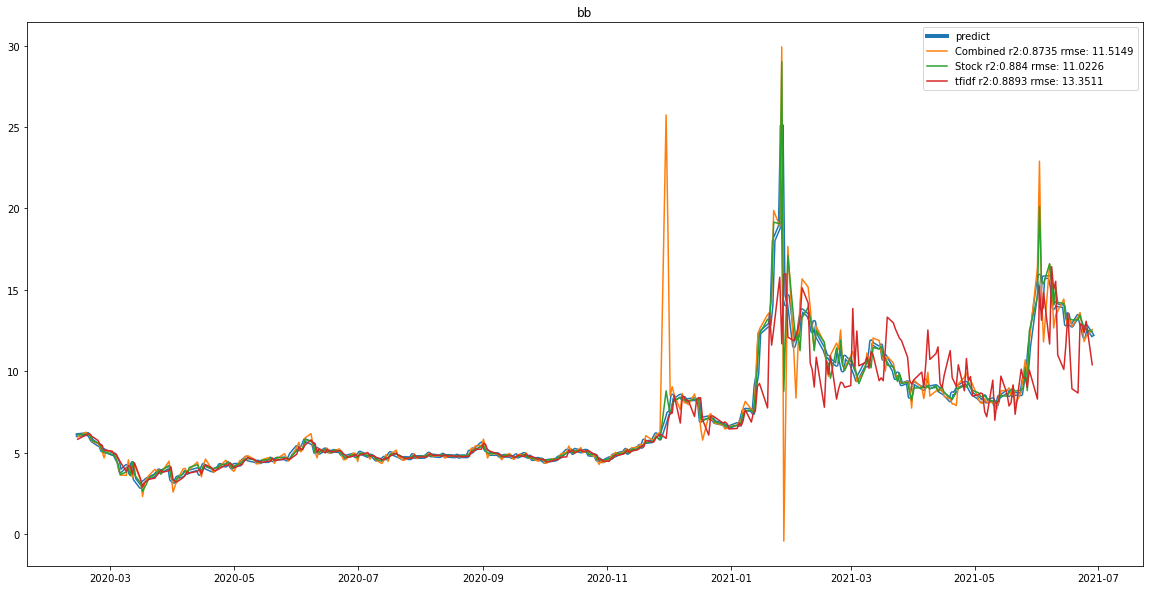

done


In [17]:
#//*** Blind Ensemble Modeling. Starts at 30 days and models Day 31. Models 31 days, to Model Day 32, Models 32 days to Model Day 33

training_days = 30
train_start_slice = 0
train_end_slice = training_days

predict_col = [f'target_1']

tfidf_top_cols = 500

#predict_df = pd.DataFrame(columns=['symbol','time','actual','predict','linear','sgd','svr','rfr'])
predict_df = pd.DataFrame(columns=['symbol','time','actual','predict','linear_combined','linear_stock','linear_tfidf'])

#symbols=['clov']

tsvd_max_features = 5
for symbol in symbols:
    
    #//*** Load Stocks for modeling
    model_df = pd.read_csv(f'./ignore_folder/model_ready_{symbol}_{interval}.csv.zip')
    model_df['time'] = pd.to_datetime(model_df['time'])
    
     
    #//*** Load tfidf from File
    tfidf = load_pickle(f'./ignore_folder/model_ready_{symbol}_{interval}_tfidf_.pkl')
    
    #//*** Load tfidf matrix into DataFrame
    start_time = time.time()
    print("Building tfidf dataframe")
    tfidf_df = pd.DataFrame(load_pickle(f'./ignore_folder/model_ready_{symbol}_{interval}_tfidf_matrix.pkl').toarray())
    tfidf_df.columns = tfidf.vocabulary_
    
    print("Build tfidf Descending Values")
    descending_vals = list(tfidf_df.sum().sort_values(ascending=False).index)
    

    
    tfidf_df[descending_vals[:1000]]
    train_stock_cols = ['close','volume','open','high','low']
    train_stock_cols = ['score','comment_count','close','volume','open','high','low']
    #train_stock_cols = ['close']
    model_df.reset_index(drop=True,inplace=True)


    #//*** Lengthy K-Means Run. Runs a model on every day after 60+ and predicts the next day. Uses the previous 60 days to predict the next day. 
    #//*** It may or may not be helpful to run k-means across the whole tfidf instead of the previous 60.


    #//*** Loop through model_df. Model each day individually. Train 60 days, Predict 61.
    
    #Loop through combined 
    for row_int in range(0,len(model_df)-training_days-1):
        
        skip_tsvd = False

        #//*** Build the slice start index
        start_dex = train_start_slice+row_int
        start_dex = 0
        #//*** Build the slice end index
        end_dex = train_end_slice+row_int

        dc = f"{start_dex}/{len(model_df)}"
        
        #//*** Build the sliced training df
        train_df = model_df[start_dex:end_dex].copy()
        train_df.reset_index(inplace=True,drop=True) 
        
        #print("Building TSVD")
        
        
        #print(mean_tfidf_cols)
        #print("Building TSVD")

        tsvd_df = tfidf_df[start_dex:end_dex]

        
        

        
        if tsvd_df.sum().sum() == 0:
            tsvd_df = pd.DataFrame()
        else:
            
            #//*** Adaptive TSVD Columns
            #//*** Performs TSVD on the Most relevant half of tfidf columns ranges from 200 - 2500 attributes / columns
            #//*** Adjusts the total number of TSVD output columns to preserve a minimum .95 variance. 
            #//*** If tsvd below the threshold, The Max features is increased by 5 until variance ratio is above 1
            check_variance = 0
            
            tsvd = TruncatedSVD(tsvd_max_features)
            
            while check_variance < .95:
                
                mean_tfidf_cols = (tsvd_df.sum() > tsvd_df.sum().mean()).sum()
            
                if mean_tfidf_cols <= tsvd_max_features:
                    mean_tfidf_cols = tsvd_max_features+1

                descending_vals = list(tfidf_df.sum().sort_values(ascending=False).index)[:mean_tfidf_cols]
                tsvd_df = tsvd_df[descending_vals]
                tsvd.fit_transform(tsvd_df)
                check_variance = tsvd.explained_variance_ratio_.sum()
                
                if check_variance < .95:
                    tsvd_max_features += 5
                    #print("Rerun: ", tsvd_max_features,tsvd.explained_variance_ratio_.sum())
                    tsvd = TruncatedSVD(tsvd_max_features)
                   
                
            #print(tsvd_max_features,mean_tfidf_cols,tsvd.explained_variance_ratio_.sum())
            tsvd_df = pd.DataFrame(tsvd.fit_transform(tsvd_df))
            
        

        

        #//*** Build the row index on the prediction (train_end_slice+1)
        predict_dex = row_int+train_end_slice+1

        #print("Starting K-Means...")
        offset=1
        

        
        
        #print(train_df[train_stock_cols].head(5))

        #x_train = np.array(train_df[train_stock_cols])
        #print(pd.concat([tsvd_df,train_df[train_stock_cols]],ignore_index=True,axis=1).head(5))
        
        x_train_combined = np.array(pd.concat([tsvd_df,train_df[train_stock_cols]],ignore_index=True,axis=1))
        x_train_tsvd = np.array(tsvd_df)
        x_train_stock = np.array(train_df[train_stock_cols])
        
        
        #print(x_train[:5])
        y_train = np.array(train_df[predict_col].values.ravel())

        #//*** Grabs a single item from the Datframe, which returns a series.
        #//*** Transpose() gets it into the proper 2-D format
        x_test_stock = pd.DataFrame(model_df.iloc[end_dex+1].copy()).transpose()[train_stock_cols]
         
        #//*** Combine the last tsvd_df value, and the next day's stock_df values to test for prediction
        #//*** The gets needlessly complicated since these are 1-d arrays
        if len(tsvd_df) > 0:
            x_test_combined = np.array(list(tsvd_df.iloc[-1]) + list(np.array(x_test_stock[train_stock_cols])[0])).reshape(1, -1)
            x_test_tsvd = np.array(list(tsvd_df.iloc[-1])).reshape(1, -1)
        else:
            #x_test = np.array(x_test[train_stock_cols])[0].reshape(1, -1)
            #print(f"skipping TSVD Model")
            skip_tsvd = True
            continue
            
        #//*** Scaling 
        #scaler = MinMaxScaler()
        
        #x_train_linear = x_train
        #x_test_linear = x_test
    
        #x_train = scaler.fit_transform(x_train)
        #x_test = scaler.fit_transform(x_test)

        y_test = np.array(model_df[predict_col].iloc[end_dex:end_dex+1],)[0]
        
        
        #random_forest = RandomForestRegressor(n_estimators=10,n_jobs=-1) 
        #random_forest.fit(x_train,y_train)
        #rf_result = random_forest.predict(x_test.reshape(1, -1))

        
        #svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
        #svr_rbf = SVR(kernel= 'rbf', C= .001, gamma= 0.1)
        
        #svr_rbf.fit(x_train, y_train)
        #svr_result = svr_rbf.predict(x_test)

        #sgd_regr = SGDRegressor( loss="huber", penalty='elasticnet', alpha=0.0001,learning_rate='adaptive')
        #sgd_regr = SGDRegressor( loss="huber", penalty='l1', alpha=0.0001,max_iter=10000,learning_rate='adaptive')
            
        #sgd_regr.fit(x_train,y_train)
        #sgd_result = sgd_regr.predict(x_test.reshape(1, -1))

 
        # Create linear regression object
        linear_regr_stock = linear_model.LinearRegression()

        # Train the model using the training sets
        linear_regr_stock.fit(x_train_stock, y_train)
        linear_result_stock = linear_regr_stock.predict(x_test_stock)

        if skip_tsvd == False:
            # Create linear regression object
            linear_regr_combined = linear_model.LinearRegression()

            # Train the model using the training sets
            linear_regr_combined.fit(x_train_combined, y_train)
            linear_result_combined = linear_regr_combined.predict(x_test_combined)

            # Create linear regression object
            linear_regr_tsvd = linear_model.LinearRegression()


            # Train the model using the training sets
            linear_regr_tsvd.fit(x_train_tsvd, y_train)
            linear_result_tsvd = linear_regr_tsvd.predict(x_test_tsvd)

        #//*** Add Results to the predict_df
        #predict_df.loc[len(predict_df)] = [symbol,model_df.iloc[end_dex]['time'],model_df.iloc[end_dex]['close'],y_test[0],linear_result[0],sgd_result[0],svr_result[0],rf_result[0]]
        #predict_df.loc[len(predict_df)] = [symbol,model_df.iloc[end_dex]['time'],model_df.iloc[end_dex]['close'],y_test[0],linear_result[0]]
            predict_df.loc[len(predict_df)] = [symbol,model_df.iloc[end_dex]['time'],model_df.iloc[end_dex]['close'],y_test[0],linear_result_combined[0],linear_result_stock[0],linear_result_tsvd[0]]

        else:
            predict_df.loc[len(predict_df)] = [symbol,model_df.iloc[end_dex]['time'],model_df.iloc[end_dex]['close'],y_test[0],np.nan,linear_result_stock[0],np.nan]

            
    if skip_tsvd == False:
        linear_combined_r2 = round(r2_score(predict_df['actual'],predict_df['linear_combined']),4)
        linear_combined_rmse = round(sqrt(mean_squared_error(predict_df['predict'], predict_df['linear_combined'])),4)

        linear_stock_r2 = round(r2_score(predict_df['actual'],predict_df['linear_stock']),4)
        linear_stock_rmse = round(sqrt(mean_squared_error(predict_df['predict'], predict_df['linear_stock'])),4)

        linear_tfidf_r2 = round(r2_score(predict_df['actual'],predict_df['linear_tfidf']),4)
        linear_tfidf_rmse = round(sqrt(mean_squared_error(predict_df['predict'], predict_df['linear_tfidf'])),4)

        fig,ax = plt.subplots()

        fig.set_figheight(10)
        fig.set_figwidth(20)
        plot_x = np.arange(len(y_test))
        plot_df = predict_df[predict_df['symbol'] == symbol]
        ax.plot(plot_df['time'],plot_df['predict'],label='predict',linewidth=4 )
        ax.plot(plot_df['time'],plot_df['predict'],color='white',linewidth=1 )
        ax.plot(plot_df['time'],plot_df['linear_combined'],label=f"Combined r2:{linear_combined_r2} rmse: {linear_combined_rmse}" )
        ax.plot(plot_df['time'],plot_df['linear_stock'],label=f"Stock r2:{linear_stock_r2} rmse: {linear_stock_rmse}" )
        ax.plot(plot_df['time'],plot_df['linear_tfidf'],label=f"tfidf r2:{linear_tfidf_r2} rmse: {linear_tfidf_rmse}" )


        plt.title(f"{symbol}")
        #plt.title(f"SGD r2: {round(sgd_r2,4)} -- rmse: {round(sgd_rmse,4)}")
        plt.legend()
        plt.show()

    else:
        linear_stock_r2 = round(r2_score(predict_df['actual'],predict_df['linear_stock']),4)
        linear_stock_rmse = round(sqrt(mean_squared_error(predict_df['predict'], predict_df['linear_stock'])),4)

    
        fig,ax = plt.subplots()

        fig.set_figheight(10)
        fig.set_figwidth(20)
        plot_x = np.arange(len(y_test))
        plot_df = predict_df[predict_df['symbol'] == symbol]
        ax.plot(plot_df['time'],plot_df['predict'],label='predict',linewidth=4 )
        ax.plot(plot_df['time'],plot_df['predict'],color='white',linewidth=1 )
        #ax.plot(plot_df['time'],plot_df['linear_combined'],label=f"Combined r2:{linear_combined_r2} rmse: {linear_combined_rmse}" )
        ax.plot(plot_df['time'],plot_df['linear_stock'],label=f"Stock r2:{linear_stock_r2} rmse: {linear_stock_rmse}" )
        ax.plot(plot_df['time'],plot_df['linear_tfidf'],label=f"tfidf r2:{linear_tfidf_r2} rmse: {linear_tfidf_rmse}" )

        plt.title(f"{symbol}")
        #plt.title(f"SGD r2: {round(sgd_r2,4)} -- rmse: {round(sgd_rmse,4)}")
        plt.legend()
        plt.show()

    #print("Done!")
    #predict_df





    #sgd_r2 = round(r2_score(predict_df['actual'],predict_df['sgd']),4)
    #sgd_rmse = round(sqrt(mean_squared_error(predict_df['actual'], predict_df['sgd'])),4)

    #svr_r2 = round(r2_score(predict_df['actual'],predict_df['svr']),4)
    #svr_rmse = round(sqrt(mean_squared_error(predict_df['actual'], predict_df['svr'])),4)



    #ax.plot(plot_df['time'],plot_df['sgd'],label=f"SGD r2:{sgd_r2} rmse: {sgd_rmse}" )
    #ax.plot(plot_df['time'],plot_df['svr'],label=f"SVR r2:{svr_r2} rmse: {svr_rmse}" )
    #ax.plot(plot_df['time'],plot_df['rfr'],label=f"RFR" )
    
    



        #print(rmse)
        #print(result)

        #//*** Update Results_df
        #results_df.loc[len(results_df)] = [predict_col[0],rmse,r2,min_slice,mid_slice,max_slice,np.array(y_test),result]
#predict_df.to_pickle("./results/Linear_Regression_Daily_v2.csv.pkl")
print('done')

In [ ]:
model_df